# **Exploratory Data Analysis notebook**

### Import Modules

In [1]:
import sys
import os

# Add project root to sys.path for easy imports
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.visualisation_tools import Visualisation
from scipy.stats import ttest_ind

### Load dataset

In [3]:
df = pd.read_csv('../data/customer_data.csv')

## Dataset Overview

### 1. Shape of the Data

In [4]:
df.shape # Shows number of rows and columns

(100000, 12)

### 2. Preview Data

In [5]:
df.head() # Show first few rows

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


### 3. Column names

In [6]:
df.columns # Show column names

Index(['id', 'age', 'gender', 'income', 'education', 'region',
       'loyalty_status', 'purchase_frequency', 'purchase_amount',
       'product_category', 'promotion_usage', 'satisfaction_score'],
      dtype='object')

### 4. Data Types

In [7]:
df.dtypes # Show data types

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

## Statistic Summary

### 1. Descriptive Statistic

In [8]:
df.describe()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,30.003260,27516.269880,9634.790840,0.300800,5.009650
std,28867.657797,4.480535,12996.782587,4799.339449,0.458608,1.038714
min,1.000000,12.000000,5000.000000,1118.000000,0.000000,0.000000
25%,25000.750000,27.000000,16271.750000,5583.000000,0.000000,4.000000
50%,50000.500000,30.000000,27584.500000,9452.000000,0.000000,5.000000
75%,75000.250000,33.000000,38747.250000,13350.000000,1.000000,6.000000
max,100000.000000,49.000000,50000.000000,26204.000000,1.000000,10.000000


### 2. Categorical Value Counts

In [9]:
df['gender'].value_counts() # Count gender

gender
Female    50074
Male      49926
Name: count, dtype: int64

In [10]:
df['education'].value_counts() # Count education

education
College       39874
Bachelor      30279
HighSchool    20031
Masters        9816
Name: count, dtype: int64

In [11]:
df['region'].value_counts() # Count region


region
East     30074
West     29935
South    20073
North    19918
Name: count, dtype: int64

In [12]:
df['loyalty_status'].value_counts() # Count loyalty status

loyalty_status
Regular    60138
Silver     29964
Gold        9898
Name: count, dtype: int64

In [13]:
df['purchase_frequency'].value_counts() # Count purchase frequency

purchase_frequency
rare          50019
occasional    29886
frequent      20095
Name: count, dtype: int64

In [14]:
df['product_category'].value_counts() # Count product category

product_category
Electronics    30027
Clothing       19989
Books          14925
Food           14822
Health         10123
Home            5079
Beauty          5035
Name: count, dtype: int64

## Data Quallity Check

### 1. Missing value count

In [15]:
df.isnull().sum() # Count missing value and sum

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64

### 2. Duplication count

In [16]:
df.duplicated().sum() # Check duplication and sum

np.int64(0)

### 3. Outlier Detection

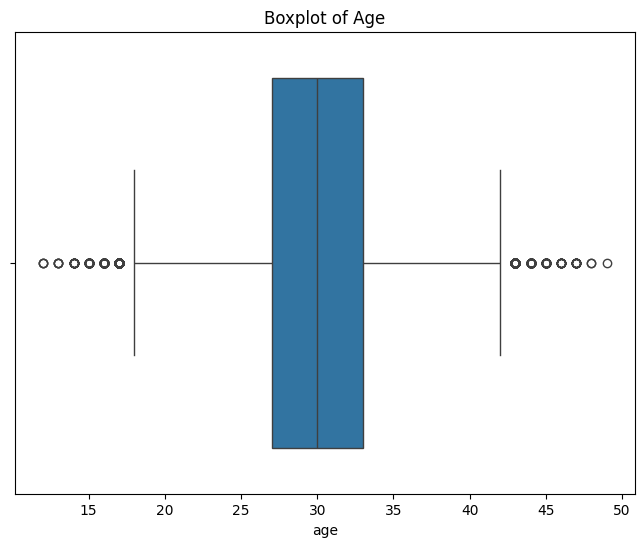

163      44
590      17
1010     43
1011     43
1125     44
         ..
99340    17
99608    43
99736    14
99829    17
99965    16
Name: age, Length: 513, dtype: int64


In [17]:
# Outlier from age column

Visualisation.create_boxplot(df, 'age', title='Boxplot of Age')
outliers = Visualisation.identify_outliers(df, 'age')

print(outliers)


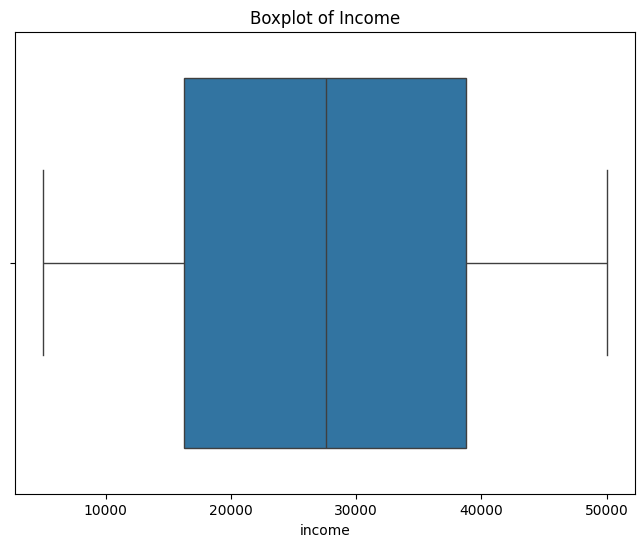

Series([], Name: income, dtype: int64)


In [18]:
# Outlier from income

Visualisation.create_boxplot(df, 'income', title='Boxplot of Income')
outliers = Visualisation.identify_outliers(df, 'income')

print(outliers)

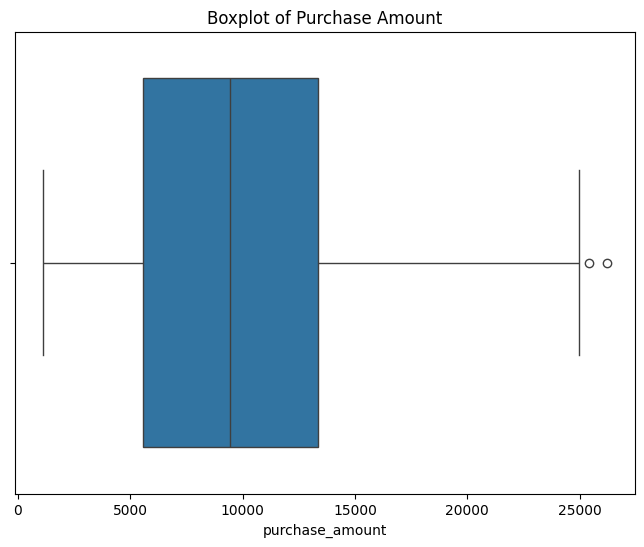

72791    25406
91489    26204
Name: purchase_amount, dtype: int64


In [19]:
# Outlier from purchase amount

Visualisation.create_boxplot(df, 'purchase_amount', title='Boxplot of Purchase Amount')
outliers = Visualisation.identify_outliers(df, 'purchase_amount')

print(outliers)

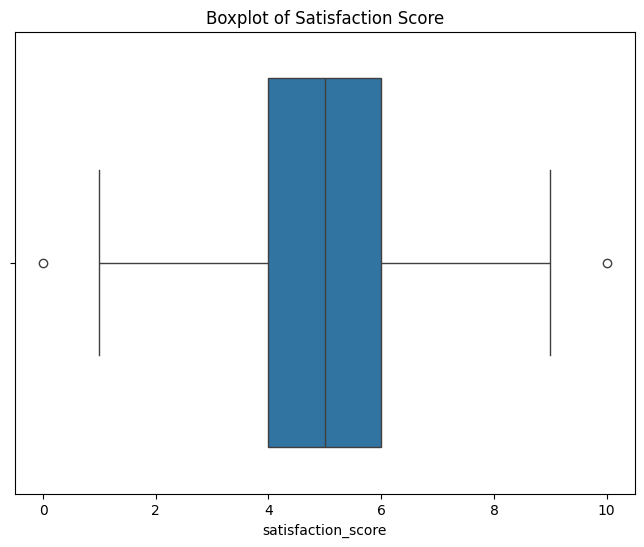

45921    10
68056     0
Name: satisfaction_score, dtype: int64


In [20]:
# Outlier from satisfaction score

Visualisation.create_boxplot(df, 'satisfaction_score', title='Boxplot of Satisfaction Score')
outliers = Visualisation.identify_outliers(df, 'satisfaction_score')

print(outliers)

## Univariate Analysis

### 1. Categorical Variables

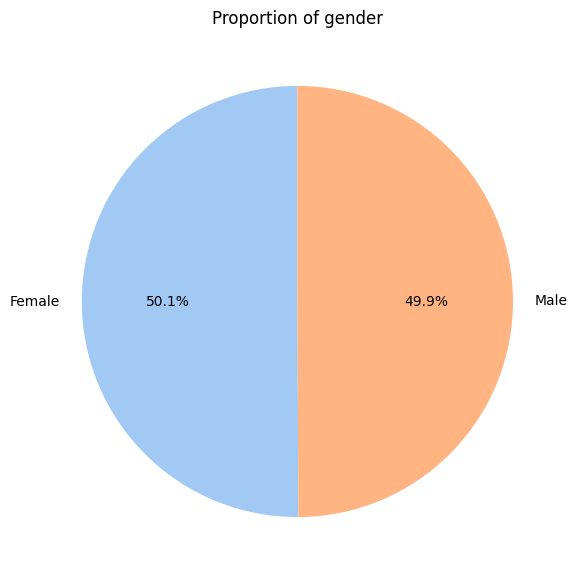

In [21]:
# Gender

Visualisation.create_pie_chart(df, 'gender')

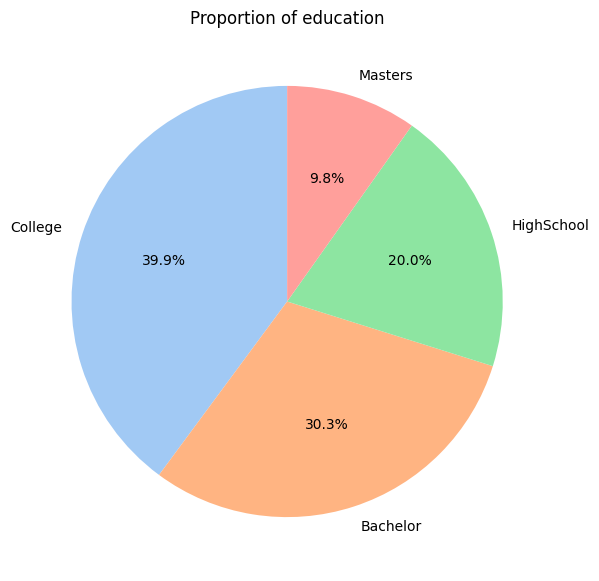

In [22]:
# Education

Visualisation.create_pie_chart(df, 'education')

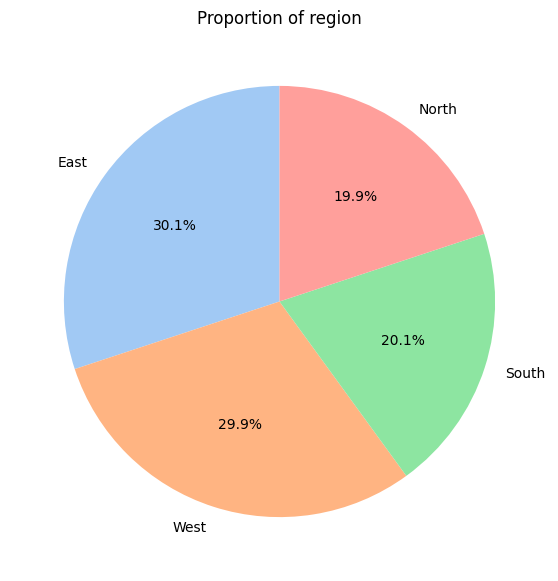

In [23]:
# Region

Visualisation.create_pie_chart(df, 'region')

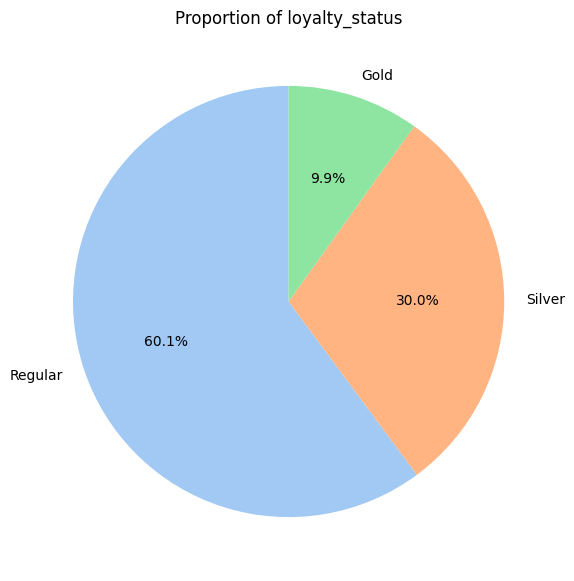

In [24]:
# Loyalty

Visualisation.create_pie_chart(df, 'loyalty_status')

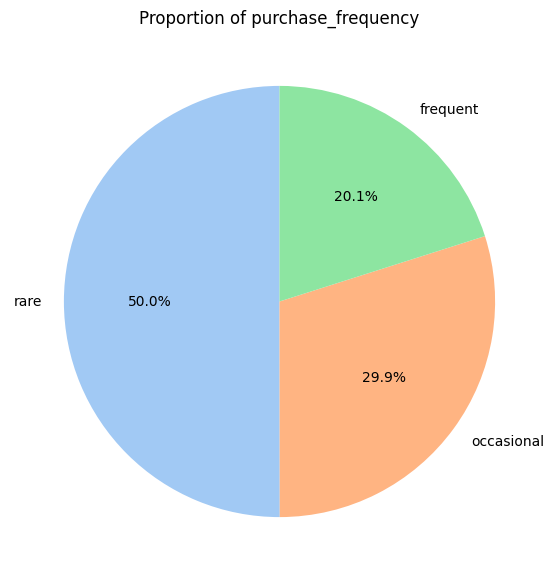

In [25]:
# Purchase frequency

Visualisation.create_pie_chart(df, 'purchase_frequency')

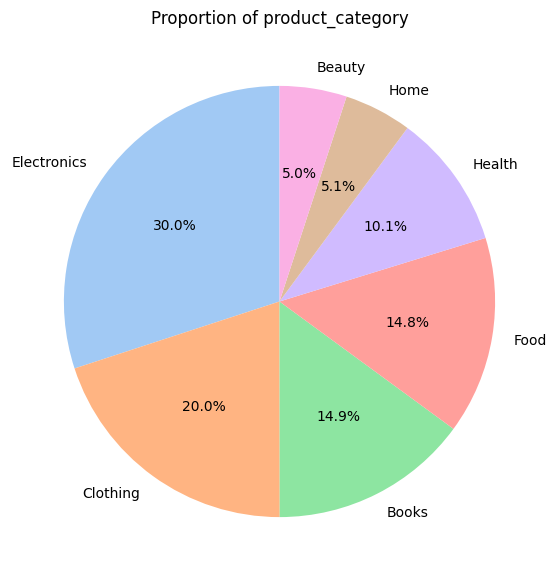

In [26]:
# Product category

Visualisation.create_pie_chart(df, 'product_category')

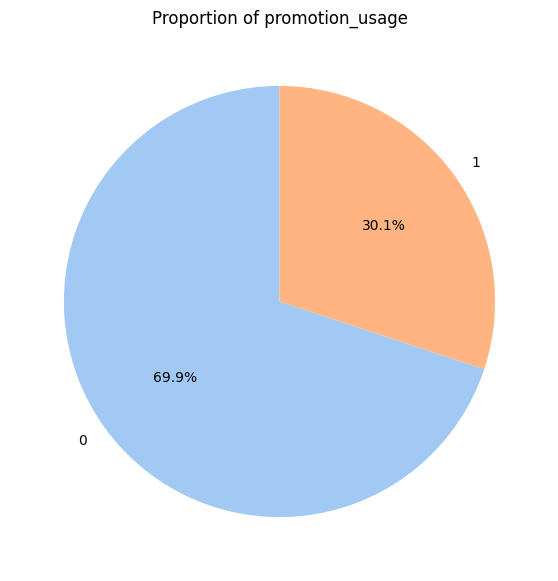

In [27]:
# Promotion usage

Visualisation.create_pie_chart(df, 'promotion_usage')

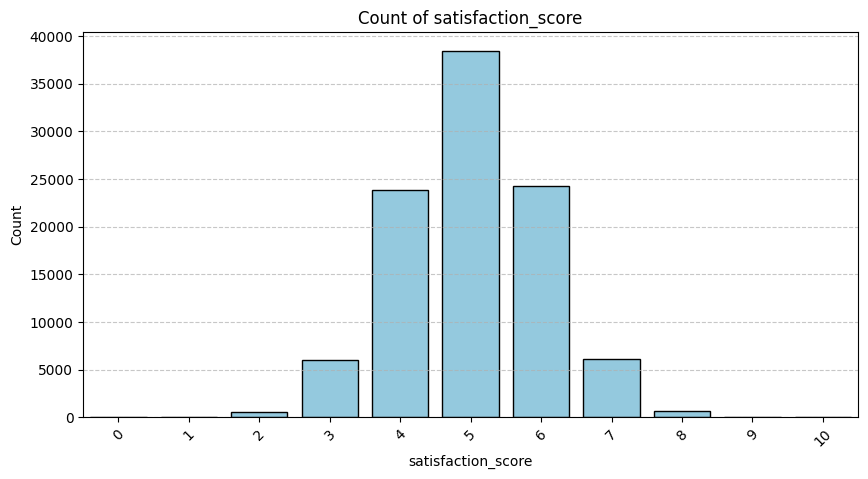

In [28]:
# Satisfaction Score

Visualisation.create_bar_chart(df, 'satisfaction_score')

### 2. Numerical Varaibles

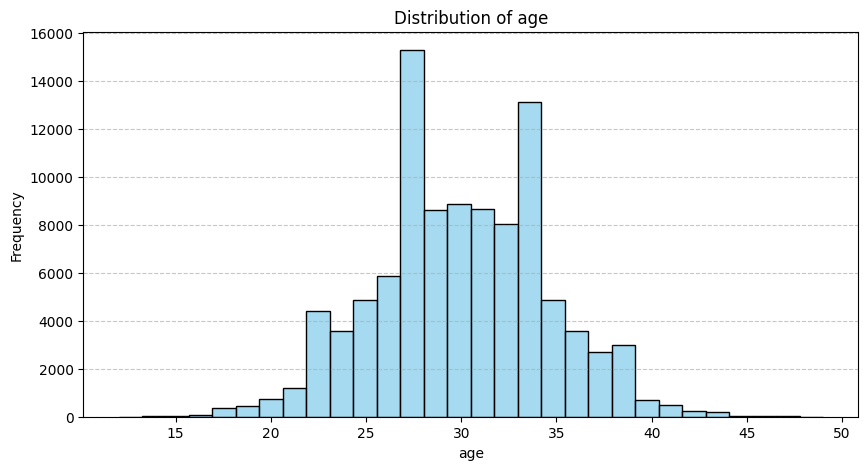

In [29]:
# Age

Visualisation.create_histogram(df, 'age')

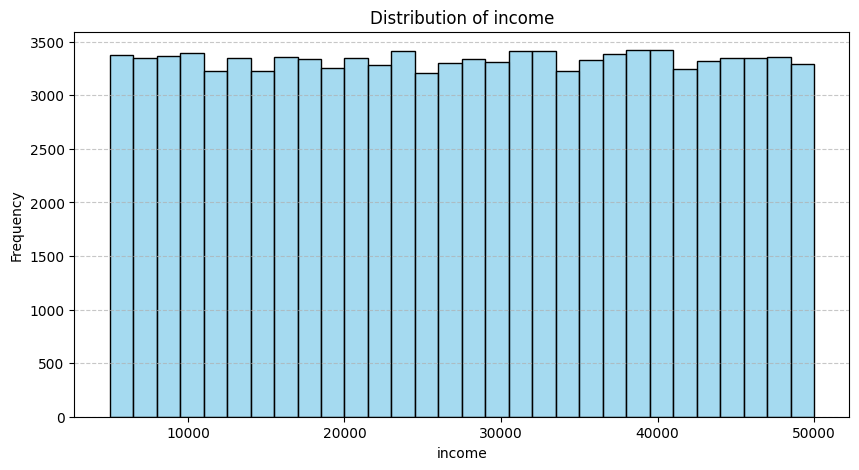

In [30]:
# Income

Visualisation.create_histogram(df, 'income')

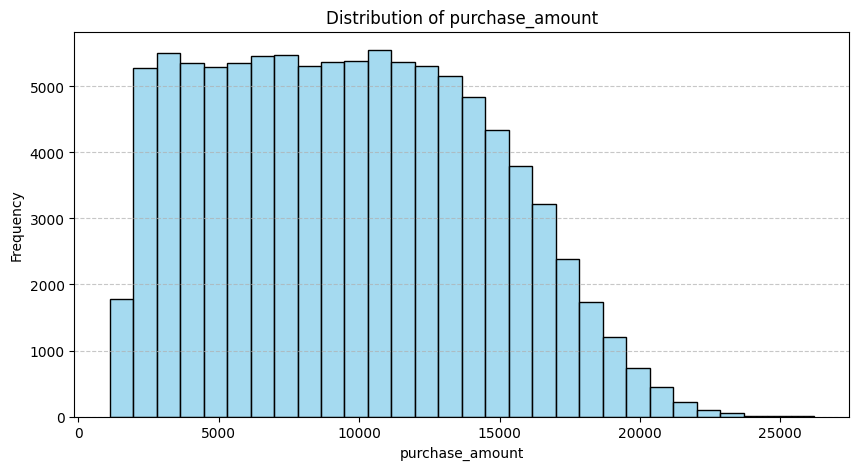

In [31]:
# Purchase amount

Visualisation.create_histogram(df, 'purchase_amount')

## Bivariate Analysis

### Correlation Analysis for Numeric variables

In [32]:
# Select variables with numbers
df_numeric = df.select_dtypes(include=['number'])

# Correlation analysis
df_numeric.corr()

,id,age,income,purchase_amount,promotion_usage,satisfaction_score
id,1.000000,0.002121,-0.001513,-0.002438,0.004607,0.002390
age,0.002121,1.000000,-0.002365,-0.002089,0.001932,0.000977
income,-0.001513,-0.002365,1.000000,0.948441,0.000756,0.002780
purchase_amount,-0.002438,-0.002089,0.948441,1.000000,0.001156,0.003424
promotion_usage,0.004607,0.001932,0.000756,0.001156,1.000000,0.000330
satisfaction_score,0.002390,0.000977,0.002780,0.003424,0.000330,1.000000


Income and Purchase amount shows significant correlation

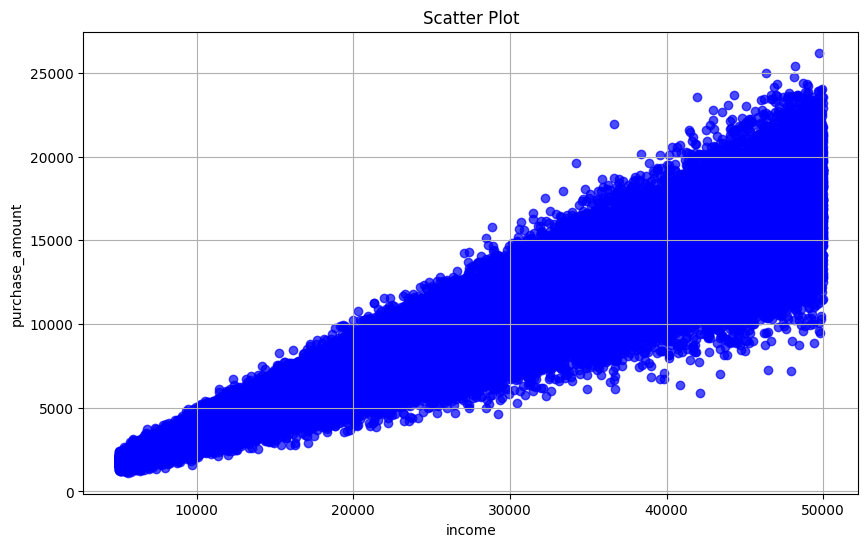

In [33]:
# Income vs Purchase amount

Visualisation.create_scatter_plot(df, 'income', 'purchase_amount')

This scatter plot shows that income and purchase amount have a positive relationship, customers who have higher income tend to purchase bigger amount.

#### P-Value test

In [34]:
Visualisation.p_value_calculator(df, 'income', 'purchase_amount')

Correlation: 0.948441254056315
p-value: 0.0
Reject the null hypothesis: Significant correlation.


The correlation is statistically meaningful.

Categorical and Numeric Variables are went through ANOVA test.

    Visualisation.anova_test(df, Numeric_variable, Categorical_variable)

No statistical siginificant relationship is detected.

Categorical Variables are went through Chi-square contribution test.

    Visualisation.chi_square_contribution(df, Categorical_variable_1, Categorical_variable_2)

No statistical significant relationship is detected.

## Multivariate Analysis

This analysis would be skipped as the data would not include meaningful statistical value.

## Feature Distributions

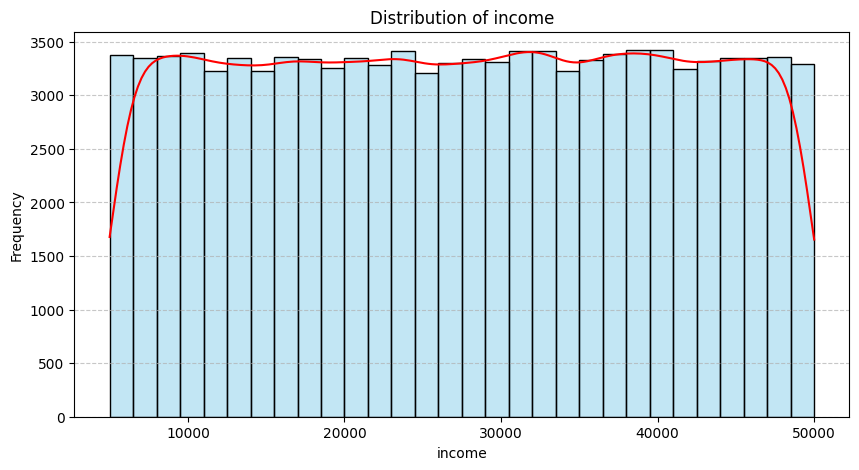

In [35]:
Visualisation.create_histogram(df, 'income', bins=30, kde=True)

The distplot shows several peaks, which mean the 'income' could be segmented in several groups.

The data is mostly spread out evenly.

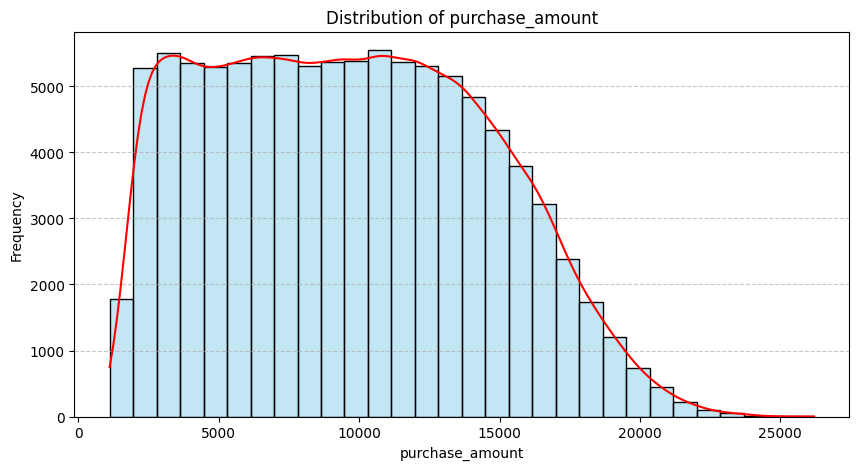

In [36]:
Visualisation.create_histogram(df, 'purchase_amount', bins=30, kde=True)

The distplot shows the 'purchase_amount' data is slightly focused on left side, which means few values in 'purchase_amount' pushes the average upward.